# **Group 8 DSF PT6-Phase 2 Project**

**`Members`**
* *steve.abonyo@student.moringaschool.com*
* *brian.kariithi@student.moringaschool.com*
* *rosaline.mungai@student.moringaschool.com*
* *ruth.nyakio@student.moringaschool.com*
* *lynette.mwiti@student.moringaschool.com*
* *ivan.wawire@student.moringaschool.com*

# 1. Business Understanding

***Overview*** : <br>
Housing sales in a northwestern county between the year `2014` and `2015`

***Problem Statement*** : <br>
Finsco Limited, a real estate group investing in USA real estate has opened a consultancy arm. for their first project, they would like to understand how home renovations might increase the estimated value of homes, and by what amount.

The goal is to get insights to provide advice to homeowners, real estate investors and clients who do house-flipping

They have tasked the Hepta Group to conduct multiple linear regression modelling to analyze house sales in a Northwestern County they have been provided with.

***Stakeholders*** : <br>
-Homeowners : *These are the people who want to increase the value of their homes and want to know the kind of renovations to do*.<br>
-Real estate agency : *The company that is conducting this model to help homeowners know what renovations to do to increase the value of their homes.*

***Understanding*** : <br>
We have several parameters/variables in our data that when adjusted/improved, may positively affect the value of homes in this county. `We need to find and observe which parameter greatly influences the value of the homes and perhaps, what parameters might give the best value of the homes.`<br>
*Our dependent variable is the value of homes; what we are trying to predict.*<br>
*Our independent variables are the home renovations, and there are several, we will use this to help us find the best possible values of the homes.*

The above two concepts (`dependent` and `independent`) lead us to the concept we are going to use which is the multiple linear regression. `Multiple linear regression` is used when we want to predict a dependent variable (value of homes) using two or more independent variables (the several parameters present in our data).

Key items to check before we build the model;
* Have a basic understanding of the data
* Which parameters greatly/least influence the value of homes for the homeowners?
* Which parameters are irrelevant to our model (*through observation after understanding our problem*)

***Implications***
* With the insights provided, Finsco Limited and its clients can strategically invest in real estate by choosing renovations that significantly increase home values.
* Homeowners working with Finsco's consultancy learn which renovations offer the best returns, helping them wisely enhance their properties.
* House flippers working with FINSCO consultancy can tailor their strategies to target high-ROI renovations.
* The consultancy's success not only benefits Finsco and its clients but also stimulates economic growth through increased renovation and property transaction activities.

# 2. Data understanding

***Data Source & Size***<br>
The data we are going to use is called `kc_house_data.csv` from the `King County House Sales` and `it has 21597 records`.

***Variables description***<br>
Below is the description of our variables;
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of .the nearest 15 neighbors

The `target variable from the above dataset is the price`, where as the `others form the predictor/independent variables`. From these datasets we can already start seeing some predictor variables that may have an impact on the target variable (*ofcourse this is by observation*), for example how will changing the number of bedrooms affect the house prices for the home owners.

***Limitations*** :<br>
From a quick observation of the data, we have noticed the `presence of missing values` in some of the predictor variables like waterfront and view. We will first have to check if the variables having missing values significantly affect the value of homes or not.<br>
Also we have noticed that `there are non-numerical variables`. Linear regression only uses numerical columns. We will have to adjust this columns to numbers if at all we are going to use them in building our model (NB: it is a requirement that we use atleast one non-numeric column)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('kc_house_data.csv')

# Displaying the first few rows of the data frame
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# Getting basic information about the datatype
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
# Descriptive statistics of our dataset
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Check for missing values
print(data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [5]:
# Sampling 5 random rows of our dataset
data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10282,1432400570,7/18/2014,254000.0,3,1.00,1160,7560,1.0,NO,NONE,...,6 Low Average,1160,0.0,1958,0.0,98058,47.4500,-122.179,1160,7560
12652,2156500220,9/23/2014,555000.0,4,2.75,2170,7140,1.0,NO,NONE,...,8 Good,1290,880.0,1977,0.0,98052,47.6910,-122.113,2120,7820
20584,1438000390,8/4/2014,469995.0,4,2.50,2350,3800,2.0,NO,NONE,...,8 Good,2350,0.0,2014,0.0,98059,47.4783,-122.123,2670,4180
16631,5411800250,7/24/2014,367000.0,3,1.00,810,7000,1.0,NO,NONE,...,7 Average,810,0.0,1968,0.0,98052,47.6591,-122.134,1820,7589
18533,194000145,3/12/2015,745000.0,4,2.75,2410,5650,1.5,NO,NONE,...,8 Good,2070,340.0,1909,0.0,98116,47.5651,-122.391,1960,5650


In [6]:
# Getting data types of our dataset
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Explore unique values and frequency counts for categorical variables
categorical_cols = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
for col in categorical_cols:
    print(data[col].value_counts())

waterfront
NO     19075
YES      146
Name: count, dtype: int64
view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64
condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64
grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64
zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64


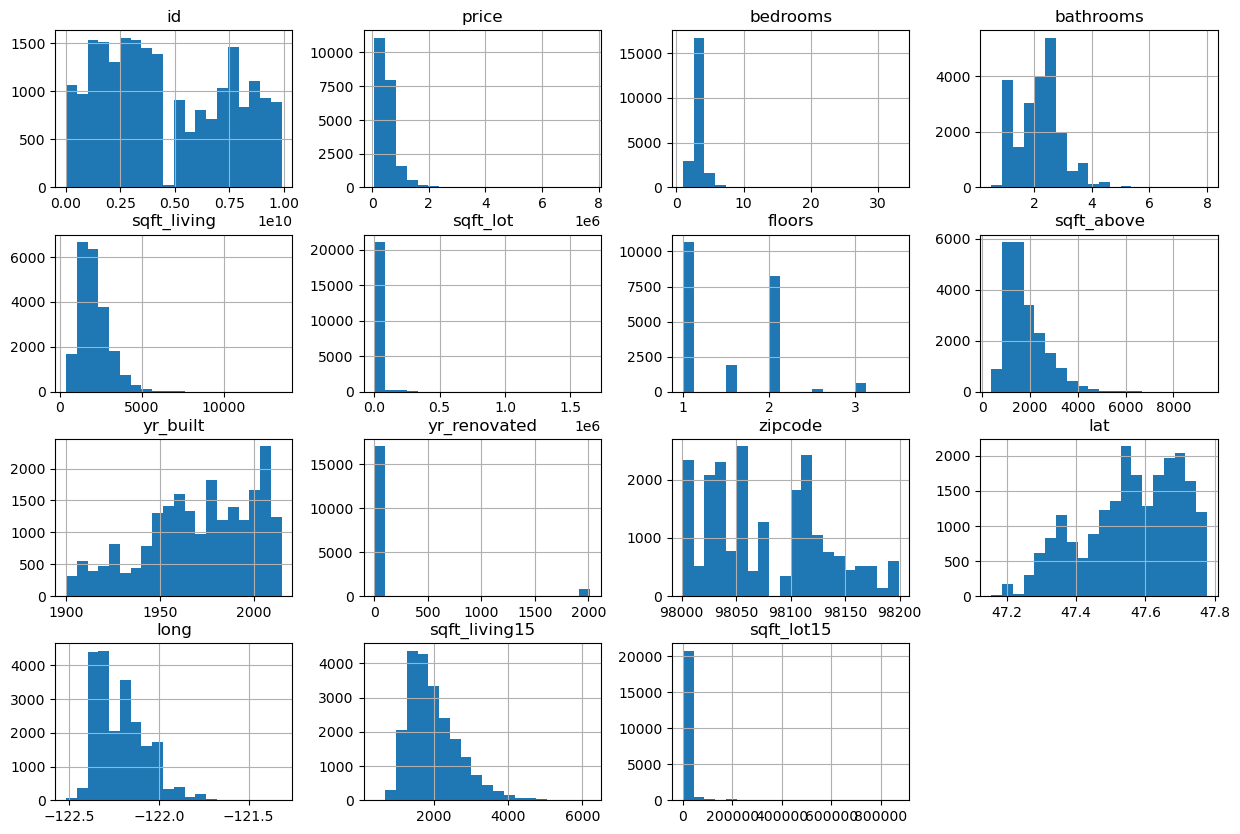

In [8]:
# Visualising how data using histogram
# Histograms for only numerical variables

data.hist(bins=20, figsize=(15,10))
plt.show()

## A. Data Cleaning

In [9]:
data['sqft_basement'].value_counts()
## 1st we can see there are a lot of zeros
## the missing values are 454(indicated as ?)

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [10]:
## lets strip the ? to be an empty space then we impute the blanks
data['sqft_basement'] = data['sqft_basement'].replace('?',None).astype("float")
data['sqft_basement'].isna().sum()

454

In [11]:
print("Mean:",data['sqft_basement'].mean())
print("Median:",data['sqft_basement'].median())

## let's check the skewness of this variable so that we know how we will impute
print("Skewness:",data['sqft_basement'].skew())
## this data is positively skewed/highly skewed/right skewed, the tail is on the right side of the distribution

Mean: 291.851723974838
Median: 0.0
Skewness: 1.574329769495408


In [12]:
## imputing the missing value using the median
data['sqft_basement'].fillna(data['sqft_basement'].median(), inplace=True)
data['sqft_basement'].isna().sum() #now there are no missing values

0

#### Dropping Columns

In [13]:
## We have decided to drop these columns

dropped_columns = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'long', 'lat', 'id', 'zipcode']
data1 = data.drop(columns = dropped_columns)
data1.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951


#### Missing Data

Column `waterfront` has missing values, we will fill the missing values with `NA` as they are empty spaces.  We don't want to manipulate the analysis by increasing the number of `YES's/ NO's`

In [14]:
print("Missing values:", data1['waterfront'].isna().sum())
print("Table BEFORE dealing with missing values")
data1['waterfront'].value_counts()

Missing values: 2376
Table BEFORE dealing with missing values


waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [15]:
data1['waterfront'].fillna("NA",inplace=True)
print("Missing values:", data1['waterfront'].isna().sum())
print("Table AFTER dealing with missing values")
data1['waterfront'].value_counts()

Missing values: 0
Table AFTER dealing with missing values


waterfront
NO     19075
NA      2376
YES      146
Name: count, dtype: int64

#### Encoding Data

In [16]:
# Checking the data types of our columns
data1.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront      object
condition       object
grade           object
yr_built         int64
dtype: object

They are 3 i.e., `waterfront`, `condition` and `grade`<br>
Based on our business problem which is ***Advice to homeowners by a real estate agency on how `home renovations` might increase the estimated `values of their homes` and by what amount using multiple linear regression***, we are going to choose `condition` variable, encode it and use it in our model.<br>
The reason is because if we improve the condition of the house e.g from average to good, then the value of the home might increase.<br>
Following the above decision, we will drop the other two categorical variables i.e., waterfront and grade

We are going to use ordinal encoding to transform our selected categorical variable to numeric variable. Why we have selected ordinal encoding is because the choices observe some sequence/hierachy

In [17]:
# Summary and count of the condition column values
data1['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [18]:
## Create the codes
condition_codes = {'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5}

## Inputting our codes back into our data frame
data1['condition_coded'] = data1['condition'].replace(condition_codes)
data1.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,condition_coded
0,221900.0,3,1.00,1180,5650,1.0,NA,Average,7 Average,1955,3
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,3


In [19]:
# Dropping more columns that contain objects

drop_columns = ['waterfront', 'condition', 'grade']
data2 = data1.drop(columns = drop_columns)
data2.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded
0,221900.0,3,1.00,1180,5650,1.0,1955,3
1,538000.0,3,2.25,2570,7242,2.0,1951,3


#### Correlation 

In [20]:
## Correlation of our selected variables to the price
data2.corr()['price'].sort_values(ascending = False)

price              1.000000
sqft_living        0.701917
bathrooms          0.525906
bedrooms           0.308787
floors             0.256804
sqft_lot           0.089876
yr_built           0.053953
condition_coded    0.036056
Name: price, dtype: float64

From the correlation results above we can already start to see that variables like sqft_living, bathrooms, bedrooms and floors will produce a better model as compared to their other counterparts.<br>
Our newly coded condition variable is the least on the correlation table, implying it will not be very significant to our model when compared to the rest.

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21597 non-null  float64
 1   bedrooms         21597 non-null  int64  
 2   bathrooms        21597 non-null  float64
 3   sqft_living      21597 non-null  int64  
 4   sqft_lot         21597 non-null  int64  
 5   floors           21597 non-null  float64
 6   yr_built         21597 non-null  int64  
 7   condition_coded  21597 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [22]:
data2.isna().sum()
##by now we dont have any missing value

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
yr_built           0
condition_coded    0
dtype: int64

In [23]:
## The final data to proceed to the modelling step
df = data2.copy(deep=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded
0,221900.0,3,1.00,1180,5650,1.0,1955,3
1,538000.0,3,2.25,2570,7242,2.0,1951,3
2,180000.0,2,1.00,770,10000,1.0,1933,3
3,604000.0,4,3.00,1960,5000,1.0,1965,5
4,510000.0,3,2.00,1680,8080,1.0,1987,3


# 3. Modelling

### A. Data Splitting

* Variable X contains all the independent features except the 'price' column.
* y contains the 'price' column, the target variable.
* We will use 20% of the data for testing and 80% for training.

In [24]:
from sklearn.model_selection import train_test_split

# Getting out independent features. We will exclude the price
X = df.drop('price', axis=1)  

# Dependent variable price which is our target feature
y = df['price']

# Split the data into training and testing data
# We will use 20% of the data for testing and 80% for training.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### B. Simple Linear Regression for each Independent Variable

In [25]:
# We are going to create a function for plotting a simple linear regression model
# This will make the plotting of linear regression models for all our features efficient

# Importing necessary libraries
import statsmodels.api as sm
import seaborn as sns

# Creating a function for simple linear regression
def simple_linear_regression(X, y):
    # Add constant to X
    X = sm.add_constant(X)

    # Fit OLS regression model
    model = sm.OLS(y, X).fit()

    # Get the coefficients
    intercept = model.params.iloc[0]
    slope = model.params.iloc[1]

    # Predictions
    y_pred = model.predict(X)

    # Plotting 
    plt.figure(figsize=(8, 6))  #Set figure size
    plt.scatter(X.iloc[:, 1], y ,color="blue", label="Data points") #original data points
    plt.plot(X.iloc[:, 1], y_pred, color="red", label="Line of best fit")
    plt.title(f'{X.columns[1]} vs Price')
    plt.xlabel(X.columns[1])
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the summary of the regression results
    print(model.summary())
    print('')
    print(f"price = {slope}*({X.columns[1]}) + {intercept}, This is in the form y = mx+c") # Creatiing and printing our function
    print("f_value:", model.fvalue)
    print("p_value:", model.f_pvalue)
    print('')

#### i. sqft_living

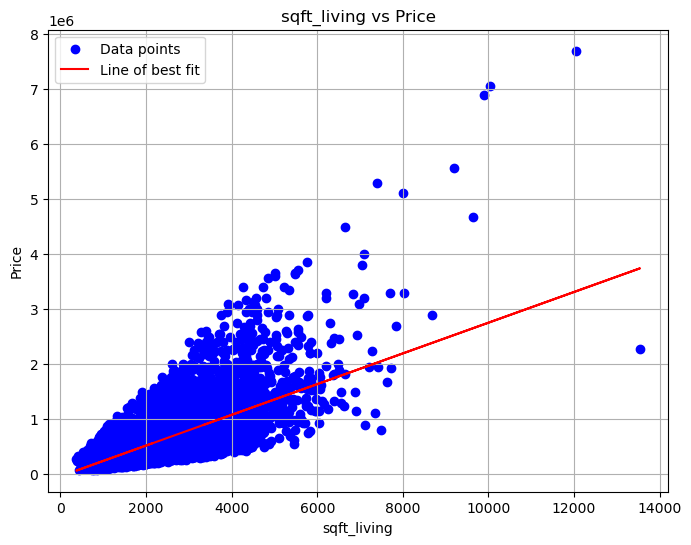

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.656e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:18:31   Log-Likelihood:            -2.4012e+05
No. Observations:               17277   AIC:                         4.802e+05
Df Residuals:                   17275   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.074e+04   4945.683     -8.238      

In [26]:
X_sqft_living = X_train[['sqft_living']]
y = y_train
simple_linear_regression(X_sqft_living, y)

* The coefficient for sqft_living is approximately 279. For every 1 unit increase in square footage of living space (sqft_living), the house price is estimated to increase by $279, while other variables are constant.
* Given a p-value of 0.000, the coefficient for sqft_living is statistically significant. This means that the sqft_living space has a significant impact on the house price.
* The R-squared value is 0.489, indicating that ~ 48.9% of the variance in house prices is explained by the sqft_living space. This suggests that the model provides a moderate fit to the data.
* The F-statistic is 1.656e+04, with a p-value of 0.000, which means that our regression model is statistically significant.

#### ii. Bedrooms

Regression results for bedrooms:


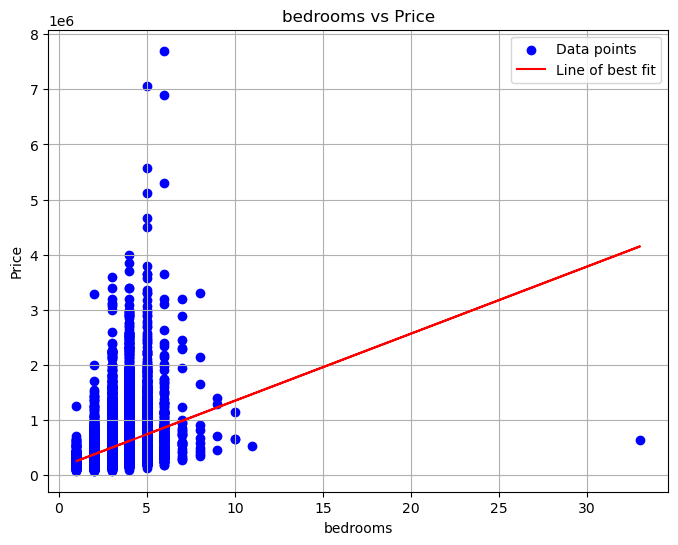

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     1820.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:18:31   Log-Likelihood:            -2.4506e+05
No. Observations:               17277   AIC:                         4.901e+05
Df Residuals:                   17275   BIC:                         4.901e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.301e+05      1e+04     13.006      0.0

In [27]:
# Call the function for bedrooms
X_bedrooms = X_train[['bedrooms']]
print("Regression results for bedrooms:")
simple_linear_regression(X_bedrooms, y)

* The coefficient for bedrooms is around 121,794. Meaning additional bedroom in a house, the price of the house might increase by USD 121,794 if there are no other changes in the house.
* The p-value of 0.000 means the coefficient for bedrooms is statistically significant
* The R-squared value is 0.095, meaning ~ 9.5% of the variance in house prices is explained by the number of bedrooms.
* The F-statistic is 1820.0, with a p-value of 0.000, meaning the regression model is statistically significant.

#### iii. Bathrooms

Regression results for bathrooms:


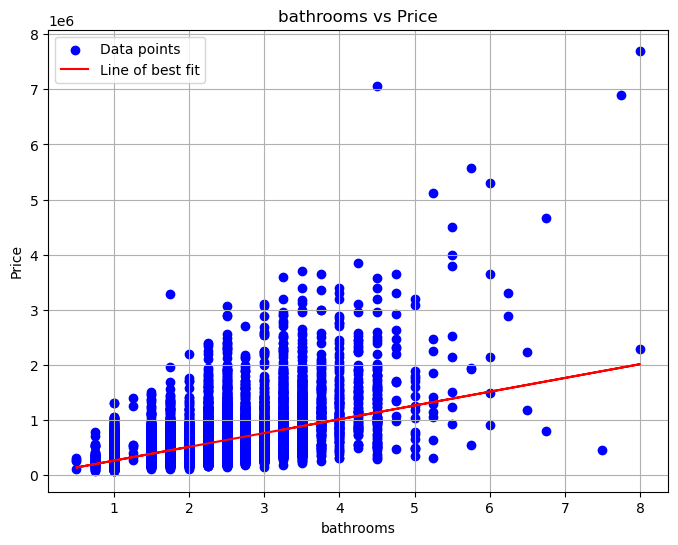

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     6569.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:18:31   Log-Likelihood:            -2.4314e+05
No. Observations:               17277   AIC:                         4.863e+05
Df Residuals:                   17275   BIC:                         4.863e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.141e+04   6958.084      1.640      0.1

In [28]:
# Call the function for bathrooms
X_bathrooms = X_train[['bathrooms']]
print("Regression results for bathrooms:")
simple_linear_regression(X_bathrooms, y)

* The coefficient for bathrooms is approximately 250,000. This means that for an additional bathroom in a house, the price of the house will increase by USD 250,000 if no other feature in the house will change.
* The coefficient for bathrooms is statistically significant, as indicated by the p-value of 0.000.
* This suggests that the number of bathrooms has a significant impact on the house price.

#### iv. Sqft Lot

Regression results for sqft_lot:


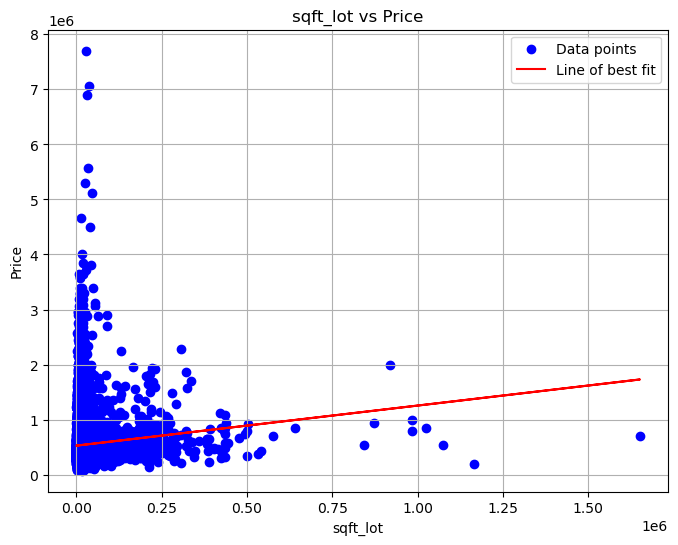

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     119.0
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.26e-27
Time:                        18:18:31   Log-Likelihood:            -2.4587e+05
No. Observations:               17277   AIC:                         4.917e+05
Df Residuals:                   17275   BIC:                         4.918e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.303e+05   2966.401    178.759      0.0

In [29]:
# Call the function for sqft_lot
X_sqft_lot = X_train[['sqft_lot']]
print("Regression results for sqft_lot:")
simple_linear_regression(X_sqft_lot, y)

* The coefficient for sqft_lot is approximately 0.728, meaning a one-unit increase in the square footage of the lot, the price of the house will increase by USD 0.8217 if no other feature changes in the house.
* Given the p-value of 0.000, This suggests that the square footage of the lot has a significant impact on the house price.
* Approximately 0.8% of the variance in house prices is explained by the square footage of the lot (sqft_lot).
* The overall regression model is statistically significant.

#### v. Floors

Regression results for floors:


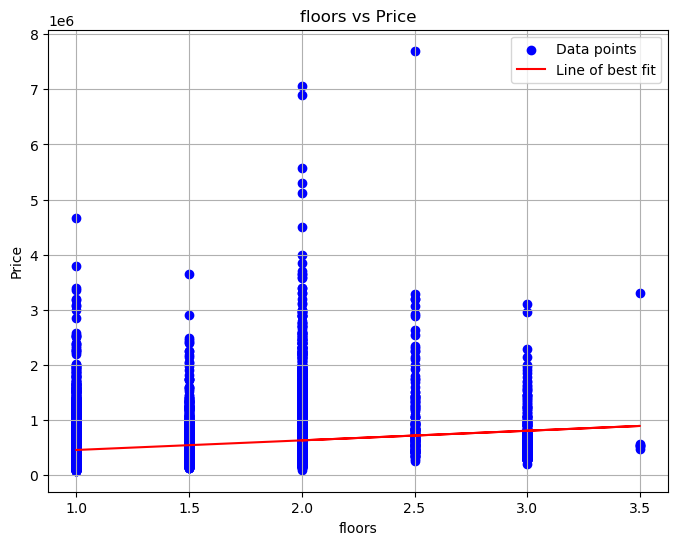

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1213.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          5.31e-257
Time:                        18:18:32   Log-Likelihood:            -2.4534e+05
No. Observations:               17277   AIC:                         4.907e+05
Df Residuals:                   17275   BIC:                         4.907e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.801e+05   7971.267     35.139      0.0

In [30]:
# Call the function for floors
X_floors = X_train[['floors']]
print("Regression results for floors:")
simple_linear_regression(X_floors, y)

* The coefficient for floors is approximately 174,483. This means that for every additional floor in a house, the price of the house will increase by USD 174,483 if all features in the house are not changed. 
* As indicated by the p-value of 0.000, the number of floors has a significant impact on the house price.
* Around 6.7% of the variance in house prices is explained by the number of floors (floors)
* The overall regression model is statistically significant given the F-statistic

#### vi. Year Built

Regression results for yr_built:


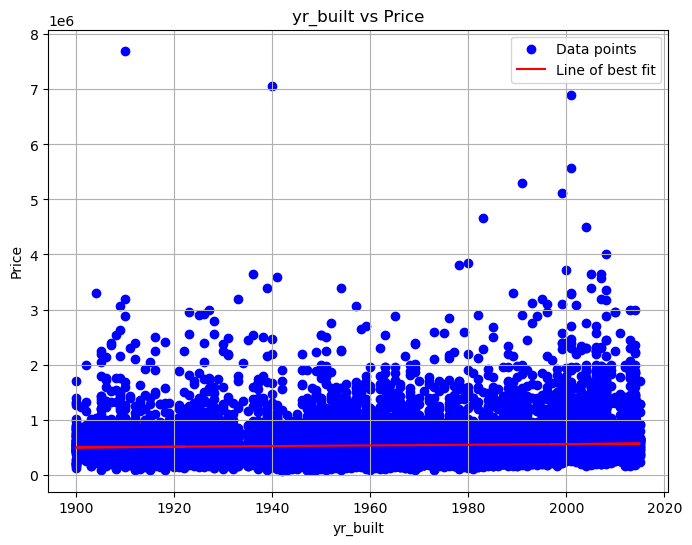

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     40.19
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.36e-10
Time:                        18:18:32   Log-Likelihood:            -2.4591e+05
No. Observations:               17277   AIC:                         4.918e+05
Df Residuals:                   17275   BIC:                         4.918e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.465e+05   1.87e+05     -3.450      0.0

In [31]:
# Call the function for yr_built
X_yr_built = X_train[['yr_built']]
print("Regression results for yr_built:")
simple_linear_regression(X_yr_built, y)

* The coefficient for yr_built is approximately 602.61. For every additional year since the year built, the price of the house is estimated to increase by USD 602.61 if the house is not renovated.
* The year the house was built has a significant influence on the house price.
* 0.2% of the variance in house prices is explained by the year the house was built
* The regression model is statistically significant given the F-statistic

#### vii. Condition Coded

Regression results for condition_coded:


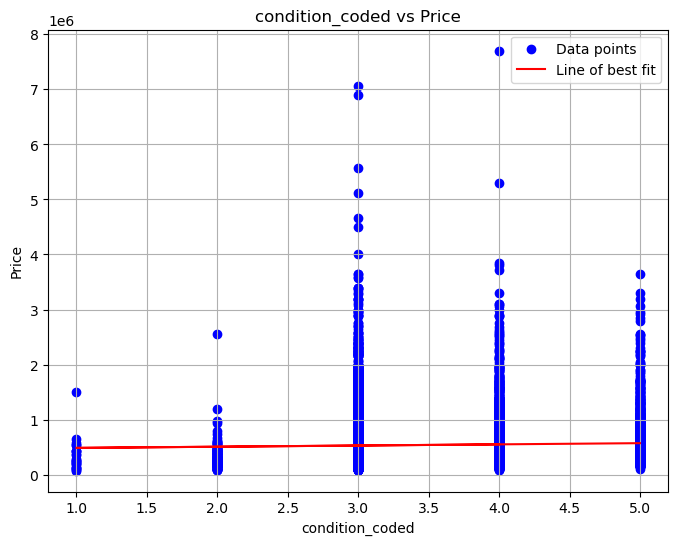

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     24.91
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           6.08e-07
Time:                        18:18:32   Log-Likelihood:            -2.4591e+05
No. Observations:               17277   AIC:                         4.918e+05
Df Residuals:                   17275   BIC:                         4.918e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.681e+05   1.49e+04     

In [32]:
# Call the function for condition_coded
X_condition_coded = X_train[['condition_coded']]
print("Regression results for condition_coded:")
simple_linear_regression(X_condition_coded, y)

* The coefficient for condition_coded is approximately USD 21,460. If the house is well maintained and the conditions improves for example from good to very good, the price of the house might increase  by USD 21,460
* This suggests that the condition code of the house has an impact on the house price.
* ~ 0.2% of the variance in house prices is explained by the condition code of the house 
* The regression model is statistically significant.

### C. Multiple Linear Regression

##### We use training data to model our multiple linear regression

In [33]:
import statsmodels.api as sm

# Add a constant term to the independent variables (required for OLS regression)
X_train_ols = sm.add_constant(X_train)

# Create and fit the OLS model
ols_model = sm.OLS(y_train, X_train_ols)
ols_results = ols_model.fit()

# Print the summary of the OLS regression results
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     3084.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:18:32   Log-Likelihood:            -2.3892e+05
No. Observations:               17277   AIC:                         4.779e+05
Df Residuals:                   17269   BIC:                         4.779e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.342e+06   1.62e+05     

#### Summary of the Multiple Regression Model

##### Model Performance
* The R-squared value of 0.556 indicates that  ~ 55.6% of the variance in the price is explained by the independent variables included in the model.
* A high F-statistic of 3084 and a low Prob(F-statistic)) means that our model is statistically significant.

##### Coefficients for independent variables:
* bedrooms: For each additional bedroom, there is an estimated decrease of approximately USD 67,790 in the price.
* bathrooms: For each additional bathroom, there is an estimated increase of approximately USD 65,130 in the price.
* sqft_living: For each additional square foot of living space, there is an estimated increase of approximately USD 302.17 in the price.
* sqft_lot: For each additional square foot of lot size, there is an estimated decrease of approximately USD 0.333 in the price.
* floors: For each additional floor, there is an estimated increase of approximately USD 58,170 in the price.
* yr_built: For each additional year of the house's age, there is an estimated decrease of approximately USD 3,290 in the price.
* condition_coded: Improvement of the overall condition of the house from 1 rating to another (e.g. good to very good) will increase the price of the house by approximately USD 19,610

##### Summary
* The high condition number suggests potential multicollinearity or numerical problems in the model.

### D. Multicollinearity

#### i. Exploring Data for Multicollinearity

In [34]:
# Previwing our data - independent variables
X_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded
2093,4,2.0,2130,2800,1.0,1922,5
9738,3,1.0,1160,3700,1.5,1909,3


In [35]:
# Training data preview - target variable
y_train.head(2)

2093    800000.0
9738    315000.0
Name: price, dtype: float64

In [36]:
X = X_train
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded
bedrooms,1.000000,0.511014,0.577830,0.034186,0.180796,0.158268,0.022288
bathrooms,0.511014,1.000000,0.758566,0.085941,0.503578,0.507776,-0.134546
sqft_living,0.577830,0.758566,1.000000,0.169754,0.356850,0.318708,-0.062333
sqft_lot,0.034186,0.085941,0.169754,1.000000,-0.002811,0.050062,-0.010503
floors,0.180796,0.503578,0.356850,-0.002811,1.000000,0.488767,-0.262695
yr_built,0.158268,0.507776,0.318708,0.050062,0.488767,1.000000,-0.366237
condition_coded,0.022288,-0.134546,-0.062333,-0.010503,-0.262695,-0.366237,1.000000


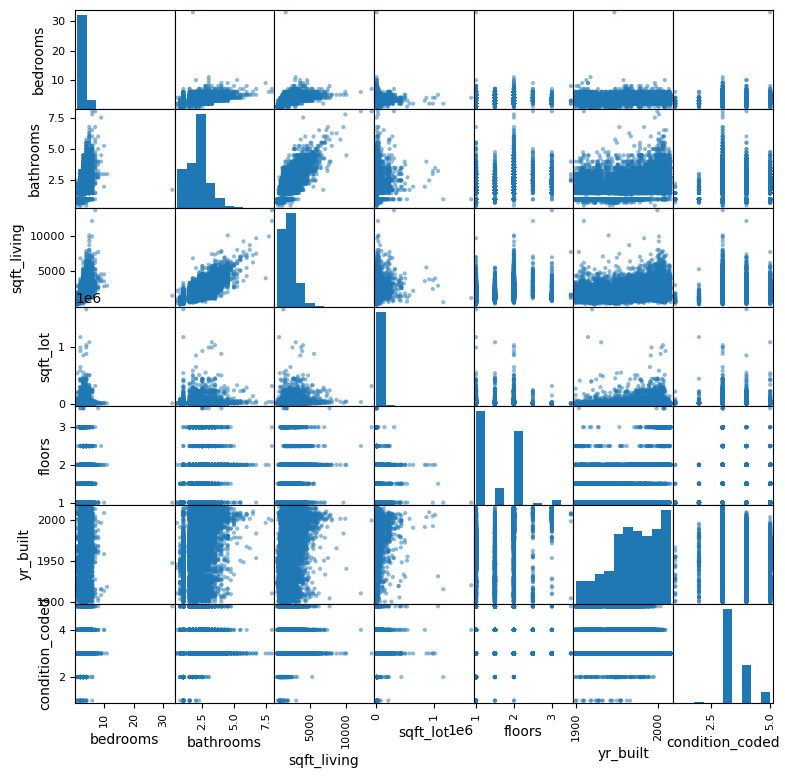

In [37]:
# Scatterplot for our independent variables

pd.plotting.scatter_matrix(X,figsize  = [9, 9]);
plt.show()

In [38]:
## Getting the correlation of the independent variables 
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded
bedrooms,1.000000,0.511014,0.577830,0.034186,0.180796,0.158268,0.022288
bathrooms,0.511014,1.000000,0.758566,0.085941,0.503578,0.507776,-0.134546
sqft_living,0.577830,0.758566,1.000000,0.169754,0.356850,0.318708,-0.062333
sqft_lot,0.034186,0.085941,0.169754,1.000000,-0.002811,0.050062,-0.010503
floors,0.180796,0.503578,0.356850,-0.002811,1.000000,0.488767,-0.262695
yr_built,0.158268,0.507776,0.318708,0.050062,0.488767,1.000000,-0.366237
condition_coded,0.022288,-0.134546,-0.062333,-0.010503,-0.262695,-0.366237,1.000000


Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation. We will use 0.75 as our cut-off

In [39]:
# Checking how many correlations have is more than 0.75
abs(X.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded
bedrooms,True,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False
sqft_living,False,True,True,False,False,False,False
sqft_lot,False,False,False,True,False,False,False
floors,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,True,False
condition_coded,False,False,False,False,False,False,True


"bathrooms" and "sqft_living" are highly correlated. Also, This relationship may influence regression model stability and interpretation.

In [40]:
df2=X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to pairs
df2.set_index(['pairs'], inplace = True)

#d rop level columns
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df2.columns = ['cc']

df2.drop_duplicates(inplace=True)

In [41]:
# Returning pairs that are highly correlated 

df2[(df2.cc>.75) & (df2.cc <1)]

,cc
pairs,
"(bathrooms, sqft_living)",0.758566


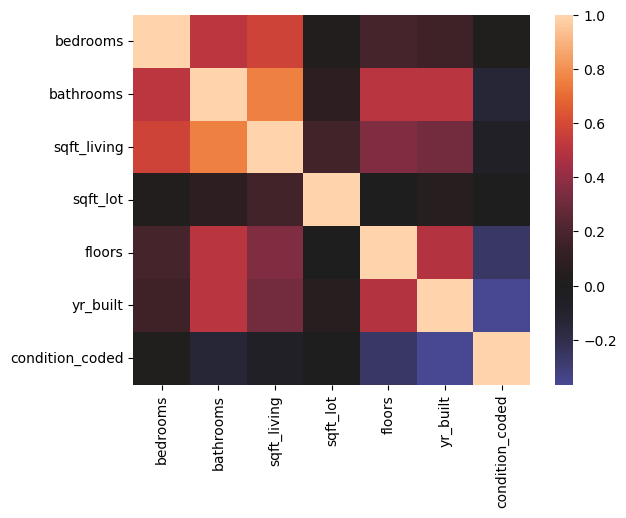

In [42]:
## Lets use heatmap to check the correlation

import seaborn as sns
sns.heatmap(X.corr(), center=0);

In [43]:
# Preview the new df
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded
2093,4,2.00,2130,2800,1.0,1922,5
9738,3,1.00,1160,3700,1.5,1909,3
4382,3,1.75,1820,15570,1.0,1948,3
11641,3,1.75,1660,8301,1.0,1955,5
13114,2,2.25,1390,1222,3.0,2009,3


In [44]:
# Create new df
data = X.copy()
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded
2093,4,2.00,2130,2800,1.0,1922,5
9738,3,1.00,1160,3700,1.5,1909,3
4382,3,1.75,1820,15570,1.0,1948,3
11641,3,1.75,1660,8301,1.0,1955,5
13114,2,2.25,1390,1222,3.0,2009,3


We will create a new column called bathroom_density to hold the ratio of bathrooms to the number of bedrooms

In [45]:
# We will only address the 2 highly correlated columns bathrooms and sqft_living
# The ratio of bathrooms to the number of bedrooms

data['bathroom_density'] = data['bathrooms'] / data['bedrooms']

In [46]:
# Preview our new data frame
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded,bathroom_density
2093,4,2.00,2130,2800,1.0,1922,5,0.500000
9738,3,1.00,1160,3700,1.5,1909,3,0.333333
4382,3,1.75,1820,15570,1.0,1948,3,0.583333
11641,3,1.75,1660,8301,1.0,1955,5,0.583333
13114,2,2.25,1390,1222,3.0,2009,3,1.125000


#### ii. Dropping column bathrooms
"Bathrooms" has a correlation coefficient of 0.76 with "sqft_living", indicating a high positive correlation.
"Bathrooms" has a correlation coefficient of 0.51 with "bedrooms", indicating a moderate positive correlation

Also 

"Bathrooms" has a correlation coefficient of 0.525906 with "price", indicating a moderate positive correlation.
"Sqft_living" has a higher correlation coefficient of 0.701917 with "price", indicating a stronger positive correlation.

So we will drop the bathrooms column

In [47]:
# Drop the 'bathrooms' column from the DataFrame
data.drop('bathrooms', axis=1, inplace=True)
data.head()

,bedrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded,bathroom_density
2093,4,2130,2800,1.0,1922,5,0.500000
9738,3,1160,3700,1.5,1909,3,0.333333
4382,3,1820,15570,1.0,1948,3,0.583333
11641,3,1660,8301,1.0,1955,5,0.583333
13114,2,1390,1222,3.0,2009,3,1.125000


In [48]:
data.corr()

,bedrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded,bathroom_density
bedrooms,1.000000,0.577830,0.034186,0.180796,0.158268,0.022288,-0.234908
sqft_living,0.577830,1.000000,0.169754,0.356850,0.318708,-0.062333,0.311833
sqft_lot,0.034186,0.169754,1.000000,-0.002811,0.050062,-0.010503,0.062219
floors,0.180796,0.356850,-0.002811,1.000000,0.488767,-0.262695,0.418674
yr_built,0.158268,0.318708,0.050062,0.488767,1.000000,-0.366237,0.425651
condition_coded,0.022288,-0.062333,-0.010503,-0.262695,-0.366237,1.000000,-0.162988
bathroom_density,-0.234908,0.311833,0.062219,0.418674,0.425651,-0.162988,1.000000


In [49]:
## Rechecking the correlation between the features
abs(data.corr()) > 0.75

,bedrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded,bathroom_density
bedrooms,True,False,False,False,False,False,False
sqft_living,False,True,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False
floors,False,False,False,True,False,False,False
yr_built,False,False,False,False,True,False,False
condition_coded,False,False,False,False,False,True,False
bathroom_density,False,False,False,False,False,False,True


In [50]:
# creating another copy of the data as X-Train
X_train = data.copy()

Regression results for yr_built:


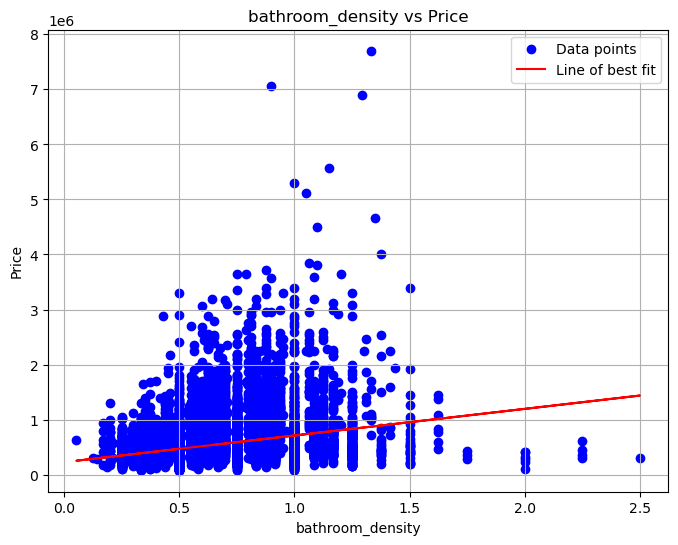

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1460.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.18e-306
Time:                        18:18:34   Log-Likelihood:            -2.4523e+05
No. Observations:               17277   AIC:                         4.905e+05
Df Residuals:                   17275   BIC:                         4.905e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.311e+05   8551.700  

In [51]:
#### Exploring the newly created column
X_bathdensity = X_train[['bathroom_density']]
print("Regression results for yr_built:")
simple_linear_regression(X_bathdensity, y)

### iii. Feature Selections and modelling

sqft_living         0.699565
bedrooms            0.308711
bathroom_density    0.279121
floors              0.256187
sqft_lot            0.082727
yr_built            0.048178
condition_coded     0.037943
Name: price, dtype: float64


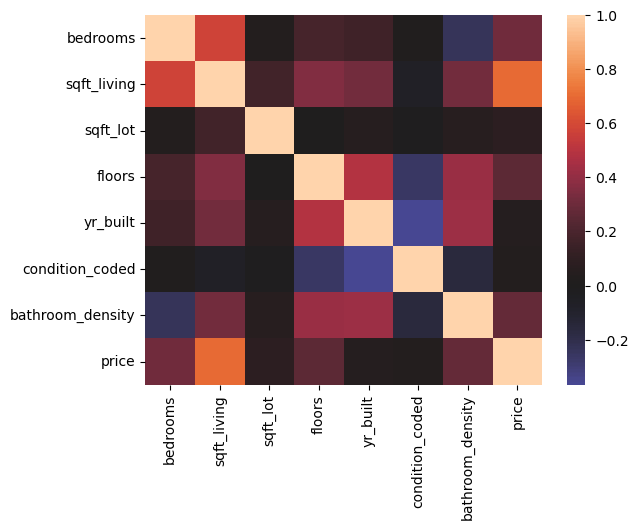

In [52]:
# Concatenate X_train and y_train into a single data frame (We need both price and independent variables for correlations)

train_data = pd.concat([X_train, y_train], axis=1)

# Calculate the p correlation coefficient
correlation_matrix = train_data.corr()

# Extract the correlations
correlation_with_y = correlation_matrix['price'].drop('price')
correlation = correlation_with_y.sort_values(ascending=False)

print(correlation)

sns.heatmap(train_data.corr(), center=0);

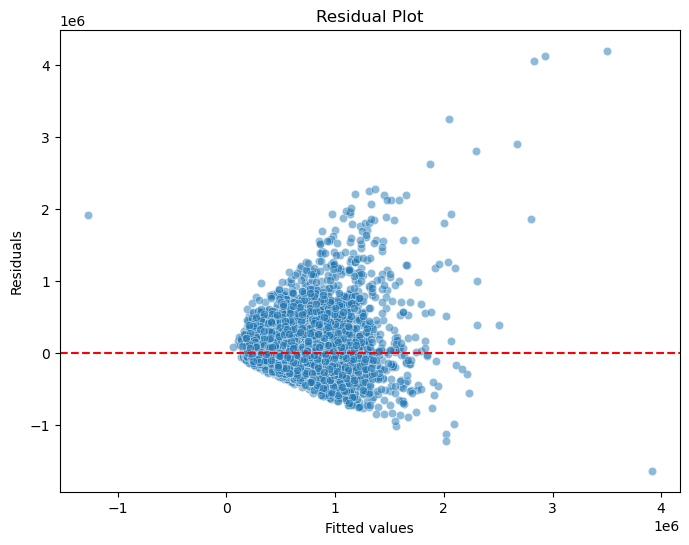

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     4372.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:18:34   Log-Likelihood:            -2.3988e+05
No. Observations:               17277   AIC:                         4.798e+05
Df Residuals:                   17272   BIC:                         4.798e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.783e+04   1.19e+04  

In [53]:
# Multiple Regression (top 4 most corr)
# Extract the feature variables and target variable

X = X_train[['sqft_living', 'bedrooms', 'bathroom_density','floors']]
y = y_train

X = sm.add_constant(X)

# Fit OLS regression model
select_model = sm.OLS(y, X).fit()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=select_model.fittedvalues, y=select_model.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Print the summary of the regression results
print(select_model.summary())

#### iv. All Features Modelling

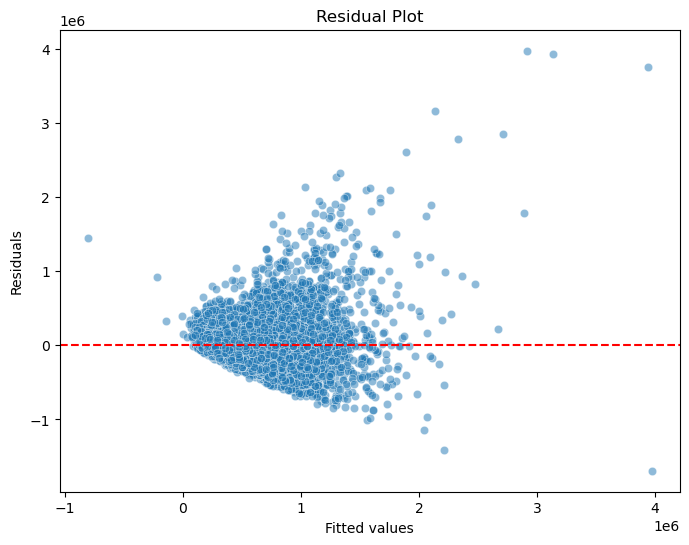

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     3059.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:18:34   Log-Likelihood:            -2.3896e+05
No. Observations:               17277   AIC:                         4.779e+05
Df Residuals:                   17269   BIC:                         4.780e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.027e+06   1.58e+05  

In [54]:
# Building a model with all the features

X_train_c = sm.add_constant(X_train)  
final_multiple_model = sm.OLS(y_train, X_train_c)
final_multiple_model = final_multiple_model.fit()

# Print a summary of the regression results


# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_multiple_model.fittedvalues, y=final_multiple_model.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Print the summary of the regression results
print(final_multiple_model.summary())

#### The Final equation for our model
###### price=(-40,210×bedrooms)+(314.97×sqft_living)−(0.35×sqft_lot)+(60,640×floors)−(-3173.25×yr_built)+(19,100×condition_coded)+(152,100×bathroom_density)+ 6,027,000

#### Model Performance

* R-squared: 55.8% of the variance in the price is explained by the independent variables included in the model.
* F-statistic: We have a high F-statistic of 3059 and a low F-statistic probability which suggests that the overall model is statistically significant.

#### v. Further Adressing the multicollineary using VIFs

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant term to the independent variables
X_train_with_const = add_constant(X_train[['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'condition_coded', 'bathroom_density']])

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

# Print VIFs
print(vif_data)

            feature          VIF
0             const  7142.086783
1          bedrooms     2.262858
2       sqft_living     2.281996
3          sqft_lot     1.042720
4            floors     1.532751
5          yr_built     1.625214
6   condition_coded     1.184428
7  bathroom_density     2.005565


##### Conclusion on multicollinearity

The VIF values for all independent features are below the commonly used threshold of 5. This means that there is low multicollinearity among the features. We will conclude based on this that our model is stable and reliable for house price prediction given our features.

### E. Model Evaluation

In [56]:
# Previewing the first 5 rows
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded
2398,3,1.00,950,4500,1.0,1943,4
14724,2,1.00,1190,6200,1.0,1948,3
20980,4,3.00,5520,8313,2.0,2008,3
12156,3,2.00,1980,12150,1.0,1994,3
19485,2,1.75,1870,6625,1.0,1948,3


In [57]:
## Aligning test data with training data
## Deleting the bathrooms column
# Adding the bathroom_density
X_test["bathroom_density"] = X_test["bathrooms"] / X_test["bedrooms"]
X_test.drop('bathrooms', axis=1, inplace=True)
X_test.head()

,bedrooms,sqft_living,sqft_lot,floors,yr_built,condition_coded,bathroom_density
2398,3,950,4500,1.0,1943,4,0.333333
14724,2,1190,6200,1.0,1948,3,0.500000
20980,4,5520,8313,2.0,2008,3,0.750000
12156,3,1980,12150,1.0,1994,3,0.666667
19485,2,1870,6625,1.0,1948,3,0.875000


In [58]:
# Additional imports
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
# Make predictions using the model with selected features as used above on our select features regression model
X_test_select = sm.add_constant(X_test[['sqft_living', 'bedrooms', 'bathroom_density', 'floors']])
y_pred_select = select_model.predict(X_test_select)

# Calculate the evaluation metrics for the model with selected features
# We will use MSE, RSME and R-squared to evaluate our model
mse_select_model = mean_squared_error(y_test, y_pred_select)
rmse_select_model = np.sqrt(mse_select_model)
r_squared_select_model = r2_score(y_test, y_pred_select)

# Print evaluation metrics for the model with selected features
print("Evaluation metrics for model with selected features:")
print("Mean Squared Error (MSE):", mse_select_model)
print("Root Mean Squared Error (RMSE):", rmse_select_model)
print("R-squared:", r_squared_select_model)
print()

Evaluation metrics for model with selected features:
Mean Squared Error (MSE): 63854708809.88749
Root Mean Squared Error (RMSE): 252694.8927261639
R-squared: 0.5219348196988436



#### Conclusion of the select features model

* The Mean Squared Error (MSE) indicates that, on average, the model's predictions are off by approximately USD 63,854,708,809.
* The Root Mean Squared Error (RMSE) suggests that, on average, the model's predictions are off by approximately USD 252,694.89.
* The R-squared value of ~0.5004 suggests that around 52.19% of the variance in the price is explained by the selected features.

In [60]:
# Make predictions using the model with all features
X_test_c = sm.add_constant(X_test)  # Add constant term for intercept
y_pred_all = final_multiple_model.predict(X_test_c)

# Calculate evaluation metrics for the model with all features
mse_final_model = mean_squared_error(y_test, y_pred_all)
rmse_final_model = np.sqrt(mse_final_model)
r_squared_final_model = r2_score(y_test, y_pred_all)

# Print evaluation metrics for the model with all features
print("Evaluation metrics for model with all features:")
print("Mean Squared Error (MSE):", mse_final_model)
print("Root Mean Squared Error (RMSE):", rmse_final_model)
print("R-squared:", r_squared_final_model)

Evaluation metrics for model with all features:
Mean Squared Error (MSE): 58831328055.64949
Root Mean Squared Error (RMSE): 242551.7018197347
R-squared: 0.5595436894400879


#### Conclusion of all features model

##### Evaluation

* Mean Squared Error (MSE): Approximately USD 58,831,328,055
* Root Mean Squared Error (RMSE): Approximately USD 242,551.70
* R-squared: Approximately 0.60
  
##### Comparison of the select feature model
* The R-squared value is higher, meaning 55.6% of the variance in the price is explained by all the features.

##### Conclusion
* The model using all features provides better predictive performance compared to the model with selected features. 

# 4. Results

* The size of the living area has a significant positive effect on the home price. For every additional square foot of living space, the price tends to increase by USD 279 to USD 322.

* The number of bedrooms in a property also positively impacts its price. Each additional bedroom contributes to an average increase of about $121,000 in the property price.
   
* The number of bathrooms in a property is positively correlated with its price. On average, each additional bathroom adds approximately $254,400 to the property price.

* The size of the lot (in square feet) has a relatively minor impact on the property price. For every unit increase in the square footage of the lot, the price tends to increase by about $0.82 on average.

* The number of floors in a property is also a significant factor in determining its price. On average, each additional floor contributes to an increase of around $176,400 in the property price.

* The age of the property (year built) has a relatively minor impact on its price. For every additional year since the property was built, the price tends to increase by approximately $600.43 on average.

* The overall condition of the property has a moderate effect on its price with the value of the house increasing from USD 19,000 to USD 22,000 on average if the house is well maintained.

* We proceeded and found out that the bathroom was highly correlated to other independent variables ie: bedrooms,sqft_living, floors, and yr_built where the correlation was above 0.75 which is a high positive correlation.
  
* We created a new column representing the ratio of bathrooms to the number of bedrooms
  
* Because of this high multicollinearity effect of the bathroom we dropped it

* The multiple regression model with select features shows an MSE of approximately 63 billion, an RMSE of around 25k, and an R-squared value of approximately 0.52.
  
* The model with all features yields an MSE of roughly 58.8 billion, an RMSE of about 242,551, and a higher R-squared value of around 0.6.
  
* This suggests that the model with all features performs slightly better, meaning that including additional features improves the model's predictive accuracy. 

# 5. Recommendations to Finsco Limited

1. Renovate and increase the living room sizes: For every additional square foot of living space, the home value will increase by around USD 279 to USD 322.

2. Upgrade and add more bedrooms.  An extra bedroom can increase the value of the property by USD 121,000 
However, clients should be careful about spending too much money on bedrooms when renovating the entire house. They might lose between USD 40,000 and 65,000.

4. Improve the overall condition of the house.  Good house maintenance can increase property value by USD 19,000 to USD 22,000

5. Add extra bathrooms to increase property value by USD USD 65,000 to USD 250,000 per bathroom. The ratio of bathrooms to bedrooms also impacted the price of the house. Clients might prefer ensuite bedrooms to shared bathrooms.

6. Making renovations of the entire house will significantly increase the value of the property compared to making partial renovations.


# 6. Next Steps

1. Feedback gathering: The Hepta team will gather feedback from the Finsco team for additional requirements and feedback.

2. Market Research: We will conduct market research to identify trends in the real estate market such as renovations and, property features demands.

3. Data Enrichment: Gather additional data on other features that affect property values. This may include users' preferences and more sales and renovation data.

4. Model improvement: Our Data scientists will try other regression algorithms for comparisons and model improvements